In [14]:
print("hello")

hello


In [15]:
import numpy as np
from matplotlib import pyplot as plt

GRAY SCALING

In [16]:

import cv2


image = cv2.imread(r'C:\Users\adith\OneDrive\Pictures\Saved Pictures\baby.jfif')
cv2.imshow('Original', image)
cv2.waitKey(1000)





-1

In [17]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

cv2.imshow('Grayscale', gray_image)
cv2.waitKey(1000)



-1

HISTOGRAM


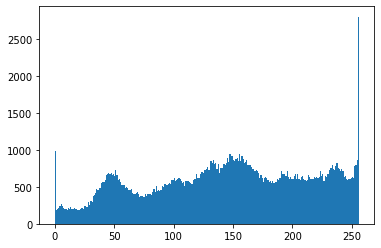

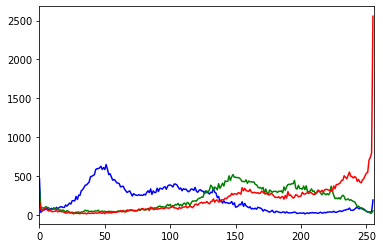

In [18]:
image = cv2.imread(r'C:\Users\adith\OneDrive\Pictures\Saved Pictures\baby.jfif')
#cv2.calcHist(images, channels(red, blue, green), mask, histsize, range[hist(accumulate)] )
histogram= cv2.calcHist([image], [0],None , [256], [0, 256])

#ravel() flatens our image array 
plt.hist(image.ravel(), 256, [0, 256]);plt.show()

color= ('b', 'g', 'r')

for i, col in enumerate(color):
    histogram2 = cv2.calcHist([image], [i],None , [256], [0, 256])
    plt.plot(histogram2, color=col)
    plt.xlim([0,256])

plt.show()

DRAWING A BLACK SQUARE 



In [20]:
import numpy as np
img= np.zeros((512,512,3), np.uint8)

#black or white
img_bw=  np.zeros((512,512), np.uint8)

cv2.imshow('black rectangle (color)', img)
cv2.imshow('black rectangle (B&W)', img_bw)

cv2.waitKey(1000)

-1

draw a line
cv2.line(image, starting coordinates, ending cordinates, color, thickness)

draw a rectangle
cv2.rectangle(image, starting vertex, opposite vertex, color, thickness)

a circle
cv2.circle(image, centre, radius, color,fill)

# translations

In [23]:
import cv2


image = cv2.imread(r'C:\Users\adith\OneDrive\Pictures\Saved Pictures\baby.jfif')

#store height and width of the image
height, width = image.shape[:2]
quarter_height, quarter_width= height/4, width/4

# T is our translation
T= np.float32([[1, 0, quarter_width],[0,1, quarter_height]])

#we use the warpAffine to tranform the image using the matrix
img_translation= cv2.warpAffine(image, T, (width, height))
cv2.imshow('translations',img_translation )
cv2.waitKey(1000)

-1

# sharpening




In [24]:
image = cv2.imread(r'C:\Users\adith\OneDrive\Pictures\Saved Pictures\baby.jfif')
cv2.imshow('Original', image)
cv2.waitKey(1000)


kernel_sharpening= np.array([[-1,-1,-1],
                           [-1,9,-1],
                           [-1,-1,-1]])
sharpened= cv2.filter2D(image,-1,kernel_sharpening )
cv2.imshow('sharpened',sharpened )
cv2.waitKey(1000)


-1

# contour

In [31]:
imag = cv2.imread(r'C:\Users\adith\OneDrive\Pictures\Saved Pictures\3.png')
cv2.imshow('Original', imag)
cv2.waitKey(1000)

#grayscale
gray=cv2.cvtColor(imag,cv2.COLOR_BGR2GRAY)

#find canny
edged=cv2.Canny(gray, 30, 200)
cv2.imshow('canny edges', edged)
cv2.waitKey(1000)

contours, hierarcy =cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
cv2.imshow('canny edges after contouring', edged)
cv2.waitKey(1000)

print('no. of contours found=' +str(len(contours)))

cv2.drawContours(imag, contours, -1, (0, 255,0), 3)
cv2.imshow('contours', imag)
cv2.waitKey(1000)



no. of contours found=4


-1

# LINE DETECTION

In [35]:
sud=cv2.imread(r'C:\Users\adith\OneDrive\Pictures\Saved Pictures\sudoku.jfif')

gray= cv2.cvtColor(sud, cv2.COLOR_BGR2GRAY)
edges= cv2.Canny(gray, 50,170 , apertureSize=3)

lines= cv2.HoughLines(edges, 1, np.pi/180, 200)

for r,theta in lines[0]:
    a= np.cos(theta)
    b= np.sin(theta)
    x0= a*r
    y0= b*r
    x1= int(x0+1000*(-b))
    y1= int(y0+1000*(a))
    x2= int(x0-1000*(-b))
    y2= int(y0-1000*(a))
    cv2.line(sud, (x1,y1), (x2,y2), (225, 0, 0), 2)

cv2.imshow('Houglas lines', sud)
cv2.waitKey(1000)

TypeError: 'NoneType' object is not subscriptable